# Trabajar con varios modelos

En este cuaderno vamos a trabajar con varios modelos simultáneamente:

* Regresión Logística
* Random Forest
* Soppor Vector Machine (SVM)


Adicionalmente, vamos a ver algunas estructuras avanzadas de programación en Python como el uso de diccionarios anidados para realizar iteraciones y guardar resultados




# Generar los datos


In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generación de datos sintéticos. 1000 observaciones, 4 variables
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=123)


# Separar el conjunto de datos en datos de entrenamiento y datos de evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


# Especificar, ajustar y evaluar varios modelos

* Especificar: seleccionar un modelo
* Ajustar: calcular los parámetros del modelo
* Evaluar: calcular las métricas de evaluación


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score

# Especificar los modelos
# Creamos un diccionario con los tres modelos a utilizar
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}

# Creamos otro diccionario para almacenar las cuatro métricas a utilizar
metricas = {"Accuracy": accuracy_score, "Precision": precision_score,
           "Recall": recall_score, "F1 Score": f1_score}

# Ajustamos los tres modelos y evaluamos
# cada modelo con las cuatro métricas
# Se guarda el resultado de las 12 (=3x4) evaluaciones en un diccionario
resultados = {}
for metrica, modelo in modelos.items():
    # Ajustar el modelo
    modelo.fit(X_train, y_train)
    # Calcular las predicciones del modelo con el test set
    y_pred = modelo.predict(X_test)
    # Evaluar el modelo y crear un diccionario para
    # cada modelo con un sub-diccionario para cada metrica
    resultados[metrica] = {metrica: tipo_metrica(y_test, y_pred) for metrica, tipo_metrica in metricas.items()}


In [3]:
resultados

{'Logistic Regression': {'Accuracy': 0.944,
  'Precision': 0.9824561403508771,
  'Recall': 0.9032258064516129,
  'F1 Score': 0.9411764705882352},
 'Random Forest': {'Accuracy': 0.992,
  'Precision': 1.0,
  'Recall': 0.9838709677419355,
  'F1 Score': 0.991869918699187},
 'SVM': {'Accuracy': 0.996,
  'Precision': 1.0,
  'Recall': 0.9919354838709677,
  'F1 Score': 0.9959514170040485}}

# Hacer un gráfico con los resultados de las métricas

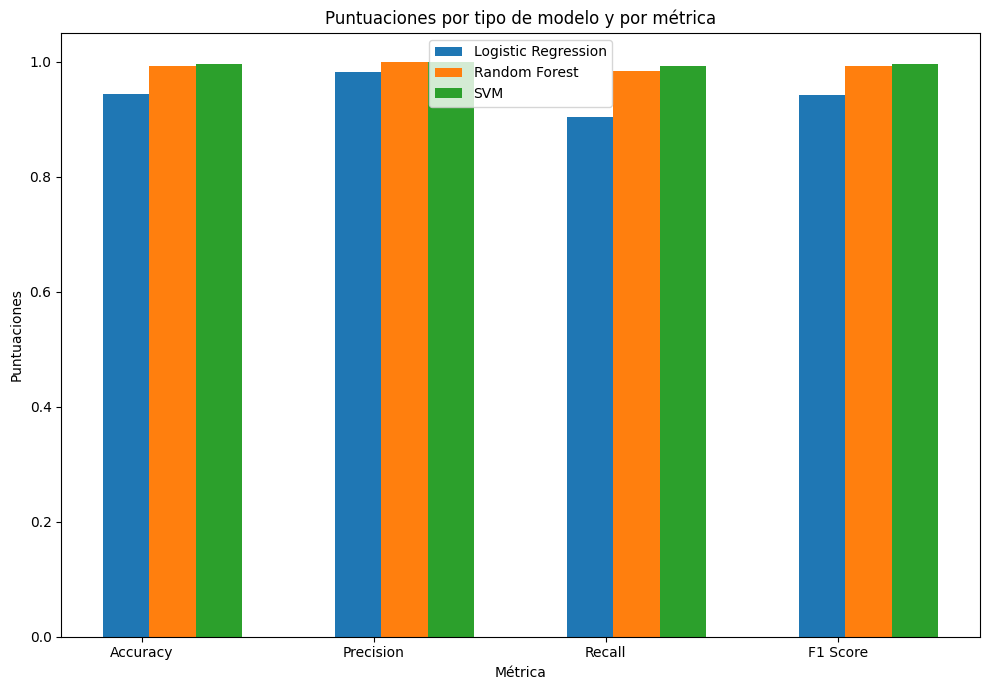

In [4]:
import matplotlib.pyplot as plt
import numpy as np


# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 7))
# Definir el ancho de las barras
ancho = 0.2
# Crear el eje x con tantos elementos como métricas. Este caso 4 métricas
x = np.arange(len(metricas))

# Hacer un gráfico por cada modelo
for i, (name, results) in enumerate(resultados.items()):
    ax.bar(x + i * ancho, results.values(), ancho, label=name)

# Añadir nombre de los ejes, título del gráfico, marcador del eje x, etc.
ax.set_ylabel('Puntuaciones')
ax.set_xlabel('Métrica')
ax.set_title('Puntuaciones por tipo de modelo y por métrica')
ax.set_xticks(x + ancho / len(modelos))
ax.set_xticklabels(metricas.keys())
ax.legend()

plt.tight_layout()
plt.show()